# Replicate focus- and single-cell gate from IDEAS using the SCI feature extraction tool

In [1]:
import pandas
import matplotlib.pyplot as plt
import seaborn
import umap
import sqlite3

In [2]:
con = sqlite3.connect("data/sc_gate_ctrl123_T0_035610.sqlite3")
df = pandas.read_sql_query("SELECT * from data", con)
con.close()

In [28]:
df["meta_fiji"] = df["meta_id"]*2+1

In [52]:
df["feat_haralickContrast_0"] = df.filter(regex="feat_haralickContrast.*_0").mean(axis=1)

In [53]:
df.head()

,feat_haralickContrastDIAGONAL_3,feat_haralickContrastDIAGONAL_5,feat_haralickContrastDIAGONAL_0,meta_file,feat_haralickContrastDIAGONAL_6,feat_haralickContrastDIAGONAL_10,feat_mean_5,feat_mean_6,feat_haralickContrastHORIZONTAL_10,feat_haralickContrastANTIDIAGONAL_10,...,feat_haralickContrastHORIZONTAL_6,feat_size_10,feat_haralickContrastHORIZONTAL_5,feat_haralickContrastHORIZONTAL_3,feat_sizeMask_3,feat_haralickContrastHORIZONTAL_0,feat_sizeMask_0,feat_size/sizeMask_0,meta_fiji,feat_haralickContrast_0
0,325.276923,130.384615,376.861538,C3_T0_66.cif,668.853846,277.384615,45.571429,228.262548,257.884146,234.678832,...,463.908537,233.0,93.146341,233.317073,1485,367.128049,1485,0.156902,33,345.172957
1,179.577381,225.541667,389.892857,C3_T0_66.cif,544.958333,435.589286,38.627010,156.199357,240.492891,429.471910,...,350.966825,282.5,127.530806,138.767773,1786,306.611374,1786,0.158175,1,335.349503
2,305.087500,290.868750,311.687500,C3_T0_66.cif,579.087500,416.656250,43.791246,156.171717,294.222222,540.337349,...,379.500000,269.0,194.808081,226.035354,1575,243.545455,1575,0.170794,11,275.633028
3,184.762195,137.164634,207.225610,C3_T0_66.cif,227.402439,167.067073,49.102094,82.036649,118.954167,250.006173,...,115.758333,176.5,93.525000,133.591667,2173,179.833333,2173,0.081224,5,202.739539
4,297.272727,150.256198,387.214876,C3_T0_66.cif,608.652893,430.884298,36.479167,169.283333,290.572368,457.474576,...,438.743421,215.5,147.085526,225.605263,1353,362.388158,1353,0.159276,15,381.316095


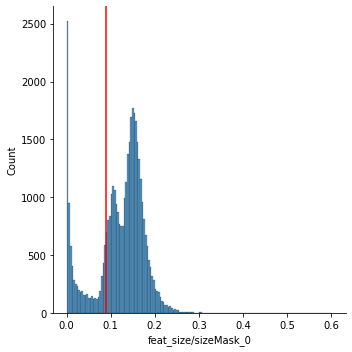

In [54]:
df["feat_size/sizeMask_0"] = df["feat_size_0"] / df["feat_sizeMask_0"]
fig = seaborn.displot(data=df, x="feat_size/sizeMask_0")
fig.ax.axvline(0.09, color="red")

In [55]:
df_gate1 = df[df["feat_size/sizeMask_0"] > 0.09]

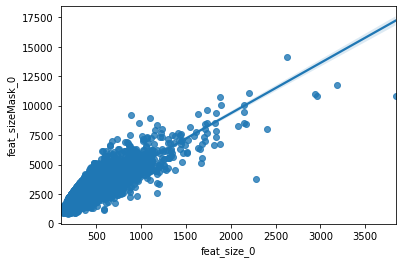

In [56]:
seaborn.regplot(data=df_gate1, x="feat_size_0", y="feat_sizeMask_0")

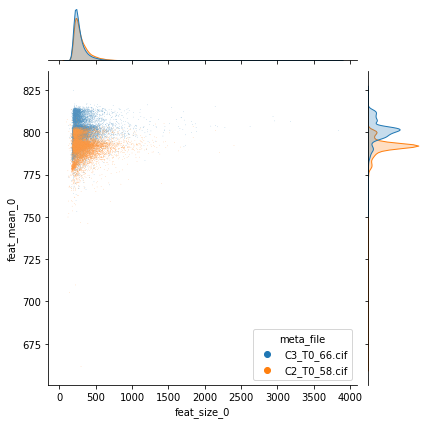

In [57]:
seaborn.jointplot(data=df_gate1, x="feat_size_0", y="feat_mean_0", s=0.2, hue="meta_file")

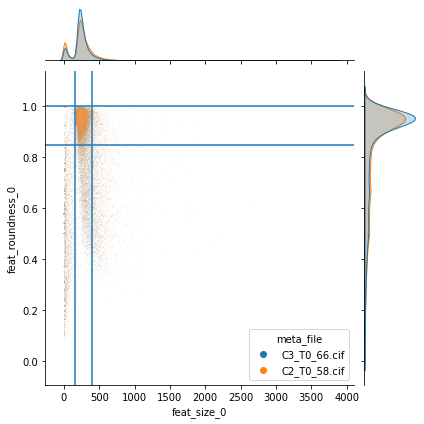

In [59]:
fig = seaborn.jointplot(data=df, x="feat_size_0", y="feat_roundness_0", hue="meta_file", s=0.1)
fig.ax_joint.axvline(150)
fig.ax_joint.axvline(400)
fig.ax_joint.axhline(1.0)
fig.ax_joint.axhline(0.85)

In [61]:
df_gate2 = df[(df["feat_size_0"] > 150) & (df["feat_size_0"] < 400) & (df["feat_roundness_0"] > 0.85)]

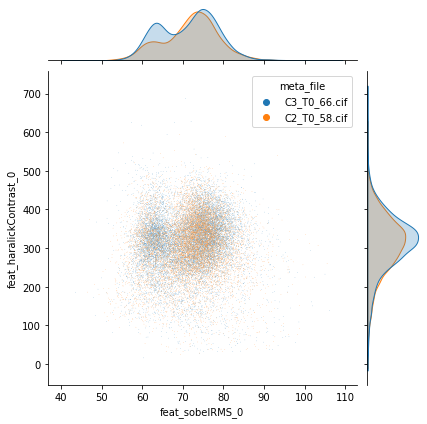

In [72]:
seaborn.jointplot(data=df_gate2, x="feat_sobelRMS_0", y="feat_haralickContrast_0", hue="meta_file", s=0.2)

In [74]:
df_gate2[df_gate2["feat_sobelRMS_0"] < 65].filter(regex="meta")

,meta_file,meta_directory,meta_id,meta_fiji
12,C3_T0_66.cif,/home/maximl/personal/data/Ctrl/C3_T0_66.cif,22,45
17,C3_T0_66.cif,/home/maximl/personal/data/Ctrl/C3_T0_66.cif,21,43
18,C3_T0_66.cif,/home/maximl/personal/data/Ctrl/C3_T0_66.cif,20,41
26,C3_T0_66.cif,/home/maximl/personal/data/Ctrl/C3_T0_66.cif,27,55
33,C3_T0_66.cif,/home/maximl/personal/data/Ctrl/C3_T0_66.cif,40,81
...,...,...,...,...
39887,C2_T0_58.cif,/home/maximl/personal/data/Ctrl/C2_T0_58.cif,19886,39773
39889,C2_T0_58.cif,/home/maximl/personal/data/Ctrl/C2_T0_58.cif,19889,39779
39917,C2_T0_58.cif,/home/maximl/personal/data/Ctrl/C2_T0_58.cif,19915,39831
39935,C2_T0_58.cif,/home/maximl/personal/data/Ctrl/C2_T0_58.cif,19929,39859


In [75]:
df_gate2[df_gate2["feat_sobelRMS_0"] > 80].filter(regex="meta")

,meta_file,meta_directory,meta_id,meta_fiji
0,C3_T0_66.cif,/home/maximl/personal/data/Ctrl/C3_T0_66.cif,16,33
4,C3_T0_66.cif,/home/maximl/personal/data/Ctrl/C3_T0_66.cif,7,15
40,C3_T0_66.cif,/home/maximl/personal/data/Ctrl/C3_T0_66.cif,45,91
85,C3_T0_66.cif,/home/maximl/personal/data/Ctrl/C3_T0_66.cif,87,175
86,C3_T0_66.cif,/home/maximl/personal/data/Ctrl/C3_T0_66.cif,91,183
...,...,...,...,...
39916,C2_T0_58.cif,/home/maximl/personal/data/Ctrl/C2_T0_58.cif,19917,39835
39944,C2_T0_58.cif,/home/maximl/personal/data/Ctrl/C2_T0_58.cif,19944,39889
39954,C2_T0_58.cif,/home/maximl/personal/data/Ctrl/C2_T0_58.cif,19953,39907
39965,C2_T0_58.cif,/home/maximl/personal/data/Ctrl/C2_T0_58.cif,19965,39931
